In [1]:
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family
plt.rcParams['axes.unicode_minus'] = False 

%matplotlib inline

In [2]:
import lotto_6_45 as lotto

In [3]:
lotto.get_info()

'selenium: 4.9.0, webdriver_manager: 3.8.6'

In [5]:
data = lotto.get_lotto_6_45_hist(1, 1065)
len(data)

1065

In [6]:
cols = ["회차", "1", "2", "3", "4", "5", "6"]
df = pd.DataFrame(data, columns=cols)
df.head()

,회차,1,2,3,4,5,6
0,1065,3,18,19,23,32,45
1,1064,3,6,9,18,22,35
2,1063,3,6,22,23,24,38
3,1062,20,31,32,40,41,45
4,1061,4,24,27,35,37,45


In [7]:
df.to_csv("lotto_6_45_hist.csv", index=False)

In [8]:
df = pd.read_csv("lotto_6_45_hist.csv")

In [9]:
df_long = df.melt(id_vars=["회차"], value_vars=["1", "2", "3", "4", "5", "6"], 
             var_name="순번", value_name="번호").set_index(["회차", "순번"])
df_long.head()

,,번호
회차,순번,
1065,1,3
1064,1,3
1063,1,3
1062,1,20
1061,1,4


In [10]:
df_long = df_long.sort_index(level=0)
df_long.head(n=6)

번호
회차 순번    
1  1   10
   2   23
   3   29
   4   33
   5   37
   6   40

In [11]:
df_long.index

MultiIndex([(   1, '1'),
            (   1, '2'),
            (   1, '3'),
            (   1, '4'),
            (   1, '5'),
            (   1, '6'),
            (   2, '1'),
            (   2, '2'),
            (   2, '3'),
            (   2, '4'),
            ...
            (1064, '3'),
            (1064, '4'),
            (1064, '5'),
            (1064, '6'),
            (1065, '1'),
            (1065, '2'),
            (1065, '3'),
            (1065, '4'),
            (1065, '5'),
            (1065, '6')],
           names=['회차', '순번'], length=6390)

In [12]:
df_long.loc[(1064, "1"), :]

번호    3
Name: (1064, 1), dtype: int64

In [13]:
df_long.loc[(1064,), :]

,번호
순번,
1,3
2,6
3,9
4,18
5,22
6,35


In [14]:
freq = df_long.value_counts().sort_index()
freq

번호
1     146
2     141
3     144
4     142
5     140
6     136
7     140
8     137
9     114
10    142
11    144
12    156
13    151
14    152
15    144
16    138
17    152
18    157
19    141
20    149
21    142
22    126
23    128
24    143
25    136
26    143
27    155
28    127
29    134
30    128
31    143
32    125
33    148
34    163
35    139
36    143
37    147
38    141
39    150
40    149
41    132
42    138
43    148
44    141
45    155
dtype: int64

In [15]:
max_x = freq.idxmax()[0]
max_y = freq[max_x]
print(f"({max_x},): {max_y}")

(34,): 163


In [16]:
mean_y = np.round(freq.mean(), 1)
mean_y

142.0

In [17]:
top_n = freq[freq >= 154].sort_values(ascending=False)
top_n

번호
34    163
18    157
12    156
27    155
45    155
dtype: int64

In [18]:
top_n.index.to_list()

[(34,), (18,), (12,), (27,), (45,)]

In [19]:
top_n.to_list()

[163, 157, 156, 155, 155]

In [20]:
q3 = freq.quantile([0.75]).to_list()[0]
q3

148.0

In [21]:
q3_or_more = freq[freq > q3]
q3_or_more

번호
12    156
13    151
14    152
17    152
18    157
20    149
27    155
34    163
39    150
40    149
45    155
dtype: int64

In [22]:
pct_80 = freq.quantile(0.8)
pct_80

149.2

In [23]:
pct_80_or_more =  freq[freq > pct_80]
pct_80_or_more

번호
12    156
13    151
14    152
17    152
18    157
27    155
34    163
39    150
45    155
dtype: int64

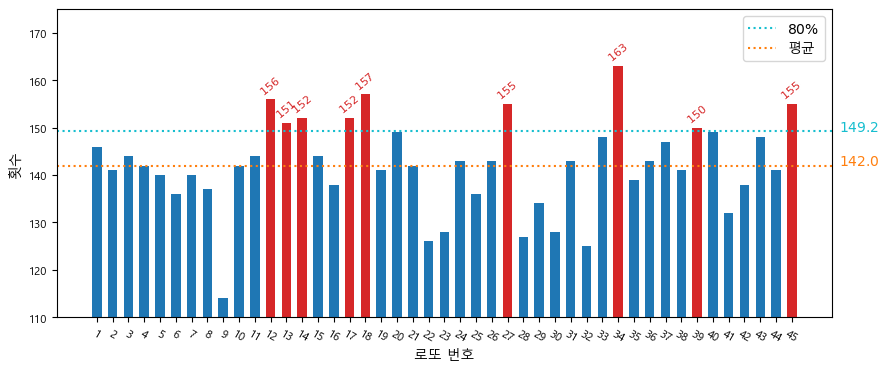

In [24]:
fig = plt.figure(figsize=(10, 4))
axes = plt.subplot(111)
colors = ["tab:red" if v in pct_80_or_more.to_list() else "tab:blue" for v in freq]
plt.bar(x=range(0, 45), height=freq, width=0.6, color=colors)
axes.set_ylim(110, 175)
axes.set_xticks(range(0, 45), labels=range(1, 46), rotation=-30, fontdict={"fontsize": 8})
axes.set_yticks(range(110, 180, 10), labels=range(110, 180, 10), fontdict={"fontsize": 8})
for num_t, y in zip(pct_80_or_more.index.to_list(), pct_80_or_more.to_list()):
    axes.text(num_t[0]-1.8, y+1, f"${y}$", color="tab:red", rotation=40, fontdict={"fontsize": 8})
axes.axhline(y=pct_80, ls=":", c="tab:cyan", label="$80\%$")
axes.text(45+2, pct_80, f"${pct_80}$", color="tab:cyan")
axes.axhline(y=mean_y, ls=":", c="tab:orange", label="평균")
axes.text(45+2, mean_y, f"${mean_y}$", color="tab:orange")
axes.set_xlabel("로또 번호")
axes.set_ylabel("횟수")
axes.legend()
plt.show()